# In this notebook, we will use Isolation Forest method to do anomaly detection.

## Exploratory Data Analysis and Feature Engineering

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("nyc_taxi.csv")
df.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [3]:
def overview(df: pd.DataFrame, timestamp_col: str = None) -> None:
    print('Null Count:\n', df.isnull().sum(),'\n')
    print('Data Types:\n', df.dtypes)
    
    if timestamp_col is not None:
        df[timestamp_col] = pd.to_datetime(df[timestamp_col], errors='coerce')

        print('\nDate Range:\n\nStart:\t',df[timestamp_col].min())
        print('End:\t',df[timestamp_col].max())
        print('Days:\t',(df[timestamp_col].max() - df[timestamp_col].min()))

In [4]:
overview(df, timestamp_col='timestamp')

Null Count:
 timestamp    0
value        0
dtype: int64 

Data Types:
 timestamp    object
value         int64
dtype: object

Date Range:

Start:	 2014-07-01 00:00:00
End:	 2015-01-31 23:30:00
Days:	 214 days 23:30:00


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
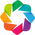

In [5]:
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

In [8]:
Hourly = hv.Curve(df.set_index('timestamp').resample('h').mean()).opts(
    opts.Curve(title="New York City Taxi Demand Hourly", xlabel="", ylabel="Demand",
               width=700, height=400,tools=['hover'],show_grid=True))

Daily = hv.Curve(df.set_index('timestamp').resample('D').mean()).opts(
    opts.Curve(title="Daily", xlabel="", ylabel="Demand",
               width=700, height=400,tools=['hover'],show_grid=True))

Weekly = hv.Curve(df.set_index('timestamp').resample('W').mean()).opts(
    opts.Curve(title="Weekly", xlabel="Date", ylabel="Demand",
               width=700, height=400,tools=['hover'],show_grid=True))


(Hourly + Daily + Weekly).opts(shared_axes=False).cols(1)

:Layout
   .Curve.I   :Curve   [timestamp]   (value)
   .Curve.II  :Curve   [timestamp]   (value)
   .Curve.III :Curve   [timestamp]   (value)

In [ ]:
df

In [9]:
df_hourly = df.set_index('timestamp').resample('h').mean().reset_index()
df_daily = df.set_index('timestamp').resample('D').mean().reset_index()
df_weekly = df.set_index('timestamp').resample('W').mean().reset_index()

In [10]:
df_daily["value"] = df_daily["value"].round(2)

In [11]:
df_daily

,timestamp,value
0,2014-07-01,15540.98
1,2014-07-02,15284.17
2,2014-07-03,14794.62
3,2014-07-04,11511.77
4,2014-07-05,11572.29
...,...,...
210,2015-01-27,4834.54
211,2015-01-28,12947.56
212,2015-01-29,14686.15
213,2015-01-30,16676.62


In [12]:
df_hourly["Weekday"] = df_hourly["timestamp"].dt.day_name()

In [13]:
df_hourly.drop(columns=["Weekday"], inplace=True)

In [ ]:
for DataFrame in [df_hourly, df_daily]:
    DataFrame['Weekday'] = DataFrame["timestamp"].dt.day_name()
    DataFrame['Hour'] = DataFrame['timestamp'].dt.hour
    DataFrame['Day'] = DataFrame['timestamp'].dt.weekday + 1
    DataFrame['Month'] = DataFrame['timestamp'].dt.month
    DataFrame['Year'] = DataFrame['timestamp'].dt.year
    DataFrame['Month_day'] = DataFrame['timestamp'].dt.day
    DataFrame['Lag'] = DataFrame['value'].shift(1)
    DataFrame['Rolling_Mean'] = DataFrame['value'].rolling(7, min_periods=1).mean().round(2)
    DataFrame = DataFrame.dropna()

In [20]:
# Showing distribution of the 'value' column

(hv.Distribution(df['value'])
.opts(opts.Distribution(title="Overall Value Distribution",
                        xlabel="Value",
                        ylabel="Density",
                        width=700, height=300,
                        tools=['hover'],
                        show_grid=True)
     ))

:Distribution   [value]   (Density)

In [21]:
by_weekday = df_hourly.groupby(['Hour','Weekday']).mean()['value'].unstack()
plot = hv.Distribution(by_weekday['Monday'], label='Monday') * hv.Distribution(by_weekday['Tuesday'], label='Tuesday') * hv.Distribution(by_weekday['Wednesday'], label='Wednesday') * hv.Distribution(by_weekday['Thursday'], label='Thursday') * hv.Distribution(by_weekday['Friday'], label='Friday') * hv.Distribution(by_weekday['Saturday'], label='Saturday') *hv.Distribution(by_weekday['Sunday'], label='Sunday').opts(opts.Distribution(title="Demand Density by Day & Hour"))
plot.opts(opts.Distribution(width=800, height=300,tools=['hover'],show_grid=True, ylabel="Freq", xlabel="Demand"))

:Overlay
   .Distribution.Monday    :Distribution   [Monday]   (Density)
   .Distribution.Tuesday   :Distribution   [Tuesday]   (Density)
   .Distribution.Wednesday :Distribution   [Wednesday]   (Density)
   .Distribution.Thursday  :Distribution   [Thursday]   (Density)
   .Distribution.Friday    :Distribution   [Friday]   (Density)
   .Distribution.Saturday  :Distribution   [Saturday]   (Density)
   .Distribution.Sunday    :Distribution   [Sunday]   (Density)

In [22]:
hv.Bars(df_hourly[['value','Weekday']].groupby('Weekday').sum()).opts(
    opts.Bars(title="New York City Taxi Demand by Day", xlabel="", ylabel="Demand",
               width=700, height=300,tools=['hover'],show_grid=True))

:Bars   [Weekday]   (value)

In [23]:
# Define the order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Set the Weekday column as a categorical type with the defined order
df_hourly['Weekday'] = pd.Categorical(df_hourly['Weekday'], categories=weekday_order, ordered=True)

In [24]:
# Group by Weekday and mean, then plot
hv.Bars(df_hourly[['value', 'Weekday']].groupby('Weekday', observed=False).mean()).opts(
    opts.Bars(title="New York City Taxi Demand by Day", xlabel="", ylabel="Demand",
              width=700, height=300, tools=['hover'], show_grid=True))

:Bars   [Weekday]   (value)

In [26]:
hv.Curve(df_hourly[['value','Hour']].groupby('Hour').mean()).opts(
    opts.Curve(title="New York City Taxi Demand Hourly", xlabel="Hour", ylabel="Demand",
               width=700, height=300,tools=['hover'],show_grid=True))

:Curve   [Hour]   (value)

In [27]:
# Group data by Hour and Weekday, calculate the mean, and unstack
by_weekday = df_hourly.groupby(['Hour', 'Weekday'], observed=False).mean()['value'].unstack()

# Define the order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a list of Curves for each weekday
curves = [hv.Curve(by_weekday[day], label=day) for day in weekday_order]

# Combine all Curves into a single plot
plot = hv.Overlay(curves).opts(
    opts.Curve(title="Average Demand by Day & Hour", width=800, height=300, tools=['hover'], show_grid=True, ylabel="Demand")
)

plot

:Overlay
   .Curve.Monday    :Curve   [Hour]   (Monday)
   .Curve.Tuesday   :Curve   [Hour]   (Tuesday)
   .Curve.Wednesday :Curve   [Hour]   (Wednesday)
   .Curve.Thursday  :Curve   [Hour]   (Thursday)
   .Curve.Friday    :Curve   [Hour]   (Friday)
   .Curve.Saturday  :Curve   [Hour]   (Saturday)
   .Curve.Sunday    :Curve   [Hour]   (Sunday)

In [ ]:
# Grouping by Hour and Weekday to calculate the average demand for every hour of each day

df_hourly = (df_hourly
             .join(df_hourly.groupby(['Hour','Weekday'], observed=False)['value'].mean().round(2),
                   on = ['Hour', 'Weekday'], rsuffix='_Average')
            )

In [33]:
df_daily = (df_daily
            .join(df_daily.groupby(['Hour','Weekday'])['value'].mean(),
                  on = ['Hour', 'Weekday'], rsuffix='_Average')
           )

In [35]:
for df in [df_hourly, df_daily]:
    df['Rolling_Mean'] = df['Rolling_Mean'].round(2)

In [36]:
df_hourly.tail()

,timestamp,value,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,value_Average
5155,2015-01-31 19:00:00,28288.5,Saturday,19,6,1,2015,31,26665.0,23537.21,24501.87
5156,2015-01-31 20:00:00,24138.0,Saturday,20,6,1,2015,31,28288.5,23673.57,22193.76
5157,2015-01-31 21:00:00,24194.5,Saturday,21,6,1,2015,31,24138.0,24031.21,21983.24
5158,2015-01-31 22:00:00,26515.0,Saturday,22,6,1,2015,31,24194.5,24635.71,23949.95
5159,2015-01-31 23:00:00,26439.5,Saturday,23,6,1,2015,31,26515.0,25485.07,25192.52


In [43]:
# Let's find top 5 saturdays with highest demand

df_daily.query("Day == 6").nlargest(5, 'value')

,timestamp,value,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,value_Average
123,2014-11-01,20553.50,Saturday,0,6,11,2014,1,17473.35,16394.36,17007.264839
130,2014-11-08,18857.33,Saturday,0,6,11,2014,8,17054.46,15995.31,17007.264839
109,2014-10-18,18778.96,Saturday,0,6,10,2014,18,17285.54,16114.16,17007.264839
102,2014-10-11,18706.42,Saturday,0,6,10,2014,11,17177.25,15994.23,17007.264839
214,2015-01-31,18702.48,Saturday,0,6,1,2015,31,16676.62,12875.73,17007.264839


In [60]:
# Average Saturday vs Max Saturday

# Filter for Saturdays
saturdays = df_hourly.query("Day == 6")

# Set the timestamp as the index
saturdays = saturdays.set_index('timestamp')

# Filter for the specific date
saturdays_on_date = saturdays.loc["2014-11-01":"2014-11-01"]

# Extract the 'value' column
sat_max = saturdays_on_date.reset_index()['value']


# Calculate the average demand for each hour on Saturdays

# Group by Weekday and Hour, and calculate the mean
grouped = df_hourly.groupby(["Weekday", "Hour"], observed=False)["value"].mean()

# Unstack the grouped data to create a table with Weekdays as columns
unstacked = grouped.unstack()

# Extract the column for Saturday
sat_avg = unstacked.T["Saturday"]


avg_max_comparison = hv.Curve(sat_avg, label='Average Saturday') * hv.Curve(sat_max, label='Busiest Saturday').opts(opts.Curve(title="Average Saturday vs Busiest Saturday"))
avg_max_comparison.opts(opts.Curve(width=800, height=300,tools=['hover'],show_grid=True, xlabel="Hour", ylabel="Demand", show_legend=True))

:Overlay
   .Curve.Average_Saturday :Curve   [Hour]   (Saturday)
   .Curve.Busiest_Saturday :Curve   [index]   (value)

## Modelling

In [62]:
#Clear nulls
df_hourly.dropna(inplace=True)

# Daily
df_daily_model_data = df_daily[['value', 'Hour', 'Day',  'Month','Month_day','Rolling_Mean']].dropna()

# Hourly
model_data = df_hourly[['value', 'Hour', 'Day', 'Month_day', 'Month','Rolling_Mean','Lag', 'timestamp']].set_index('timestamp').dropna()

In [64]:
model_data

,value,Hour,Day,Month_day,Month,Rolling_Mean,Lag
timestamp,,,,,,,
2014-07-01 01:00:00,5433.0,1,2,1,7,7459.25,9485.5
2014-07-01 02:00:00,3346.5,2,2,1,7,6088.33,5433.0
2014-07-01 03:00:00,2216.5,3,2,1,7,5120.38,3346.5
2014-07-01 04:00:00,2189.5,4,2,1,7,4534.20,2216.5
2014-07-01 05:00:00,3439.5,5,2,1,7,4351.75,2189.5
...,...,...,...,...,...,...,...
2015-01-31 19:00:00,28288.5,19,6,31,1,23537.21,26665.0
2015-01-31 20:00:00,24138.0,20,6,31,1,23673.57,28288.5
2015-01-31 21:00:00,24194.5,21,6,31,1,24031.21,24138.0


In [67]:
from sklearn.ensemble import IsolationForest

In [68]:
def run_isolation_forest(model_data: pd.DataFrame, contamination=0.005, n_estimators=200, max_samples=0.7) -> pd.DataFrame:
    
    IF = (IsolationForest(random_state=0,
                          contamination=contamination,
                          n_estimators=n_estimators,
                          max_samples=max_samples)
         )
    
    IF.fit(model_data)
    
    output = pd.Series(IF.predict(model_data)).apply(lambda x: 1 if x == -1 else 0)
    
    score = IF.decision_function(model_data)
    
    return output, score

In [69]:
outliers, score = run_isolation_forest(model_data)

In [70]:
df_hourly = (df_hourly
             .assign(Outliers = outliers)
             .assign(Score = score)
            )

df_hourly

,timestamp,value,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,value_Average,Outliers,Score
1,2014-07-01 01:00:00,5433.0,Tuesday,1,2,7,2014,1,9485.5,7459.25,5028.19,0.0,0.037801
2,2014-07-01 02:00:00,3346.5,Tuesday,2,2,7,2014,1,5433.0,6088.33,3052.11,0.0,0.056089
3,2014-07-01 03:00:00,2216.5,Tuesday,3,2,7,2014,1,3346.5,5120.38,2039.58,0.0,0.053583
4,2014-07-01 04:00:00,2189.5,Tuesday,4,2,7,2014,1,2216.5,4534.20,2031.26,0.0,0.061102
5,2014-07-01 05:00:00,3439.5,Tuesday,5,2,7,2014,1,2189.5,4351.75,3207.34,0.0,0.076468
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,Saturday,19,6,1,2015,31,26665.0,23537.21,24501.87,0.0,0.001273
5156,2015-01-31 20:00:00,24138.0,Saturday,20,6,1,2015,31,28288.5,23673.57,22193.76,0.0,0.004279
5157,2015-01-31 21:00:00,24194.5,Saturday,21,6,1,2015,31,24138.0,24031.21,21983.24,0.0,0.046274
5158,2015-01-31 22:00:00,26515.0,Saturday,22,6,1,2015,31,24194.5,24635.71,23949.95,1.0,0.027190


In [ ]:
# Let's visualize the anomalies detected by Isolation Forest
anomalies = df_hourly[df_hourly['Outliers'] == 1]
anomalies

,timestamp,value,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,value_Average,Outliers,Score
2976,2014-11-02 00:00:00,24109.5,Sunday,0,7,11,2014,2,26002.0,25969.00,23898.73,1.0,0.029635
2977,2014-11-02 01:00:00,37204.5,Sunday,1,7,11,2014,2,24109.5,27525.07,21593.53,1.0,-0.077895
4415,2014-12-31 23:00:00,17989.0,Wednesday,23,3,12,2014,31,24297.0,22600.50,18186.27,1.0,0.056311
4416,2015-01-01 00:00:00,25850.0,Thursday,0,4,1,2015,1,17989.0,23652.36,12698.50,1.0,-0.028662
4417,2015-01-01 01:00:00,29292.0,Thursday,1,4,1,2015,1,25850.0,24911.43,8132.56,1.0,-0.062865
4418,2015-01-01 02:00:00,25753.5,Thursday,2,4,1,2015,1,29292.0,25270.36,5350.21,1.0,-0.057267
4510,2015-01-04 22:00:00,10661.0,Sunday,22,7,1,2015,4,11943.0,14461.00,14499.90,1.0,0.027034
4654,2015-01-10 22:00:00,26865.5,Saturday,22,6,1,2015,10,24271.5,25118.86,23949.95,1.0,0.038038
4655,2015-01-10 23:00:00,28351.0,Saturday,23,6,1,2015,10,26865.5,26108.00,25192.52,1.0,-0.015079
5036,2015-01-26 20:00:00,3630.5,Monday,20,1,1,2015,26,4565.5,6621.79,19880.77,1.0,0.002162


In [ ]:
IF = IsolationForest(random_state=0, contamination=0.005, n_estimators=200, max_samples=0.7)
IF.fit(model_data)

# New Outliers Column
df_hourly['Outliers'] = pd.Series(IF.predict(model_data)).apply(lambda x: 1 if x == -1 else 0)

# Get Anomaly Score
score = IF.decision_function(model_data)

# New Anomaly Score column
df_hourly['Score'] = score

,timestamp,value,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,value_Average,Outliers,Score
1,2014-07-01 01:00:00,5433.0,Tuesday,1,2,7,2014,1,9485.5,7459.25,5028.19,0.0,0.037801
2,2014-07-01 02:00:00,3346.5,Tuesday,2,2,7,2014,1,5433.0,6088.33,3052.11,0.0,0.056089
3,2014-07-01 03:00:00,2216.5,Tuesday,3,2,7,2014,1,3346.5,5120.38,2039.58,0.0,0.053583
4,2014-07-01 04:00:00,2189.5,Tuesday,4,2,7,2014,1,2216.5,4534.20,2031.26,0.0,0.061102
5,2014-07-01 05:00:00,3439.5,Tuesday,5,2,7,2014,1,2189.5,4351.75,3207.34,0.0,0.076468


In [73]:
df_hourly

,timestamp,value,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,value_Average,Outliers,Score
1,2014-07-01 01:00:00,5433.0,Tuesday,1,2,7,2014,1,9485.5,7459.25,5028.19,0.0,0.037801
2,2014-07-01 02:00:00,3346.5,Tuesday,2,2,7,2014,1,5433.0,6088.33,3052.11,0.0,0.056089
3,2014-07-01 03:00:00,2216.5,Tuesday,3,2,7,2014,1,3346.5,5120.38,2039.58,0.0,0.053583
4,2014-07-01 04:00:00,2189.5,Tuesday,4,2,7,2014,1,2216.5,4534.20,2031.26,0.0,0.061102
5,2014-07-01 05:00:00,3439.5,Tuesday,5,2,7,2014,1,2189.5,4351.75,3207.34,0.0,0.076468
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,Saturday,19,6,1,2015,31,26665.0,23537.21,24501.87,0.0,0.001273
5156,2015-01-31 20:00:00,24138.0,Saturday,20,6,1,2015,31,28288.5,23673.57,22193.76,0.0,0.004279
5157,2015-01-31 21:00:00,24194.5,Saturday,21,6,1,2015,31,24138.0,24031.21,21983.24,0.0,0.046274
5158,2015-01-31 22:00:00,26515.0,Saturday,22,6,1,2015,31,24194.5,24635.71,23949.95,1.0,0.027190


We can now see the anomaly scores for each data point. The lower, the more abnormal. Negative scores represent outliers, positive scores represent inliers.

This offers us some flexibility in determining our cutoff points for anomalies

### Viewing the Anomalies

In [74]:
def outliers(thresh):
    print(f'Number of Outliers below Anomaly Score Threshold {thresh}:')
    print(len(df_hourly.query(f"Outliers == 1 & Score <= {thresh}")))

In [76]:
outliers(-0.01)

Number of Outliers below Anomaly Score Threshold -0.01:
17


In [78]:
from bokeh.models import HoverTool

In [80]:
tooltips = [
    ('Weekday', '@Weekday'),
    ('Day', '@Month_day'),
    ('Month', '@Month'),
    ('Value', '@value'),
    ('Average Value', '@value_Average'),
    ('Outliers', '@Outliers')
]
hover = HoverTool(tooltips=tooltips)

hv.Points(df_hourly.query("Outliers == 1")).opts(size=10, color="#ee2f09") * hv.Curve(df_hourly).opts(opts.Curve(title="New York City Taxi Demand Anomalies", xlabel="Date", ylabel="Demand" , height=300, responsive=True,tools=[hover,'box_select', 'lasso_select', 'tap'],show_grid=True))

:Overlay
   .Points.I :Points   [timestamp,value]   (Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,value_Average,Outliers,Score)
   .Curve.I  :Curve   [timestamp]   (value,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,value_Average,Outliers,Score)

In [81]:
len(df_hourly.query("Outliers == 1"))

26

### Assessing Outliers

In [83]:
import numpy as np
frequencies, edges = np.histogram(score, 50)
hv.Histogram((edges, frequencies)).opts(width=800, height=300,tools=['hover'], xlabel='Score')

:Histogram   [x]   (Frequency)

In [94]:
# Loop to view number of outliers at different thresholds

for num in (np.arange(-0.10, 0.2, 0.05)):
   formatted_num = f"{num:.2f}"  # Format the number to 2 decimal places
   print(f"Number of outliers for threshold value {formatted_num}:", len(df_hourly.query(f"Outliers == 1 & Score <= {num}")))
   num_outliers = len(df_hourly.query(f"Outliers == 1 & Score <= {num}"))

Number of outliers for threshold value -0.10: 0
Number of outliers for threshold value -0.05: 4
Number of outliers for threshold value 0.00: 19
Number of outliers for threshold value 0.05: 25
Number of outliers for threshold value 0.10: 26
Number of outliers for threshold value 0.15: 26
Number of outliers for threshold value 0.20: 26


In [ ]:
# Let's visualize the anomalies detected by Isolation Forest at threshold value = 0.05

hover = HoverTool(tooltips=tooltips)

hv.Points(df_hourly.query("Outliers == 1 & Score <= 0.05")).opts(size=10, color='#ff0000') * hv.Curve(df_hourly).opts(opts.Curve(title="New York City Taxi Demand", xlabel="Date", ylabel="Demand" , height=300, responsive=True,tools=[hover,'box_select', 'lasso_select', 'tap'],show_grid=True))

:Overlay
   .Points.I :Points   [timestamp,value]   (Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,value_Average,Outliers,Score)
   .Curve.I  :Curve   [timestamp]   (value,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,value_Average,Outliers,Score)

We can keep changing the threshold value to see how the detected outliers can change.

## Conclusion

Anomalies spotted: 

- the NYC marathon on 02/11/2014 (high demand)
- New Year's Eve on 31/12/2014 (high demand for taxis during celebrations)
- A snow storm on 26/01/2015 (low demand)


Other methods for anomaly detection include but are not limited to:

- Clustering
- Gaussian Probability
- One-Class SVM
- Markov processes

## Attribution

This notebook was created as part of an anomaly detection project. The following resources and tools were used:

- **Dataset**: NYC Taxi Demand dataset (https://www.kaggle.com/datasets/boltzmannbrain/nab/data)
- **Reference Project**: This work was inspired by the Kaggle project "Time Series Anomaly Detection https://www.kaggle.com/code/joshuaswords/time-series-anomaly-detection".